## Initial Test

In [1]:
import sys
sys.path.append("../")
import os

current_directory = os.getcwd()
print(current_directory)
from egta.symmetric_game import *
from egta.game import *
from egta.utils.eq_computation import *
from egta.utils.log_multimodal import *
from egta.utils.random_functions import *
from egta.utils.simplex_operations import *
from egta.process_data import *
import matplotlib.pyplot as plt
from egta.reductions.dpr import DPRGAME
import random
import itertools
from game_simulators_test import games


/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta


Matplotlib created a temporary cache directory at /var/folders/fh/fwc37qhn04d8sxp65hwv1kxm0000gn/T/matplotlib-_50s6b2d because the default path (/Users/gabesmithline/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
# Generate and display the data
rps_profiles, rps_strategy_names = games.generate_prisoners_dilemma(num_players=2)#generate_blotto_data(num_players=25, num_battlefields=2, num_troops=2)#generate_rps_25_player_data()
print(rps_profiles)
rps_data = rps_profiles

[[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Cooperate', 1.0]], [['agent_1', 'Defect', 0], ['agent_2', 'Defect', 0]], [['agent_1', 'Cooperate', -4.0], ['agent_2', 'Defect', 5.0]], [['agent_1', 'Cooperate', 6], ['agent_2', 'Cooperate', 6]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]], [['agent_1', 'Cooperate', -4.0], ['agent_2', 'Cooperate', 1.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Cooperate', -4.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Cooperate', -4.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]], [['agent_1', 'Cooperate', -4.0], ['agent_2', 'Defect', 5.0]], [['agent_1', 'Cooperate', -4.0], ['agent_2', 'Defect', 5.0]], [['agent_1', 'Defect', 0.0], ['agent_2', 'Cooperate', -4.0]], [['agent_1', 'Cooperate', -4.0], ['agent_2', 'Cooperate', 1.0]], [['agent_1', 'Defect', 0.0],

[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Cooperate', 1.0]]
[['agent_1', 'Defect', 0], ['agent_2', 'Defect', 0]]
[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Defect', 5.0]]
[['agent_1', 'Cooperate', 6], ['agent_2', 'Cooperate', 6]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]]
[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Cooperate', 1.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Cooperate', -4.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Cooperate', -4.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Defect', 0.0]]
[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Defect', 5.0]]
[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Defect', 5.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Cooperate', -4.0]]
[['agent_1', 'Cooperate', -4.0], ['agent_2', 'Cooperate', 1.0]]
[['agent_1', 'Defect', 0.0], ['agent_2', 'Coo

/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/../egta/symmetric_game.py:53: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.config_table = torch.tensor(config_table, dtype=torch.float32, device=device)
/Users/gabesmithline/Desktop/SRG/melo_project/marketsim/egta/../egta/symmetric_game.py:54: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.payoff_table = torch.tensor(payoff_table, dtype=torch.float32, device=device)


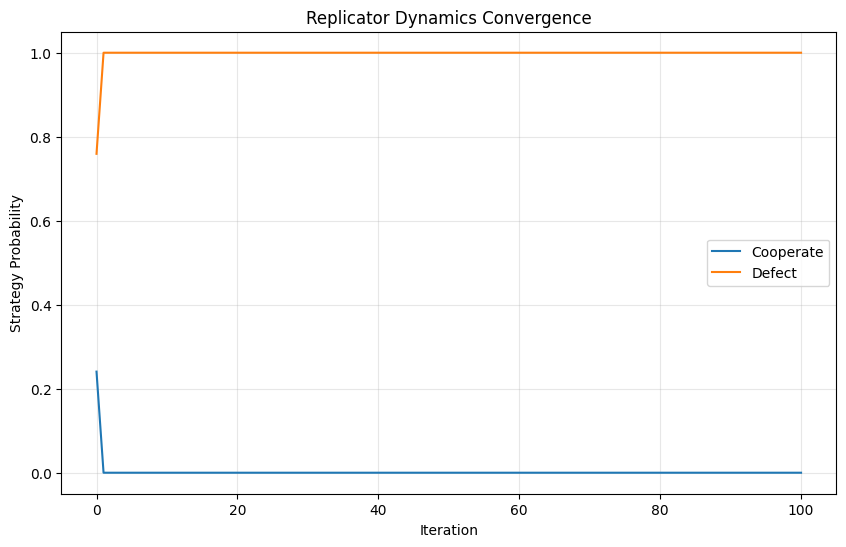

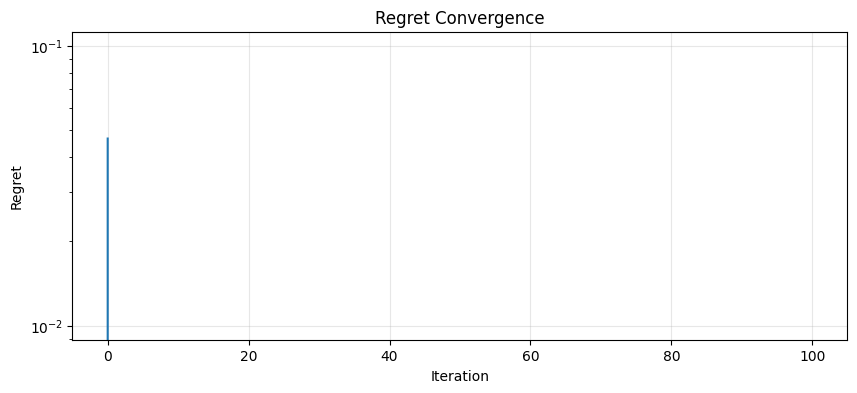

In [3]:
# Create symmetric game from the data
device = "cuda" if torch.cuda.is_available() else "cpu"
rps_game = create_symmetric_game_from_data(rps_data, device=device)
print(rps_game.num_players)
print(rps_game.num_actions)
print(rps_game.strategy_names)
print(rps_game.config_table)
print(rps_game.payoff_table)
print(rps_game.print_full_heuristic_payoff_table())
print(f"Created RPS game with {rps_game.num_players} players and {rps_game.num_actions} strategies")
print(f"Strategy names: {rps_game.strategy_names}")

#find Nash equilibrium using replicator dynamics
iters = 100

#generate random mixture
random_mixture = torch.rand(rps_game.num_actions, device=rps_game.device)
random_mixture = simplex_normalize(random_mixture)
print(f"Starting random mixture: {random_mixture}")

#run fictitious play
#NOTE: very sensitive to step size, and the initial mixture
#FP works, gradient descent works, rd works
#Not better response does not work?

'''
NOTE:, very sensitive to step size, and the initial mixture, and other hyperparameters
'''
eq_mixture, eq_history = logged_replicator_dynamics(rps_game, random_mixture, iters=iters, offset=.5)
print(eq_history)
print("\nNash Equilibrium:")
for i, strat in enumerate(rps_game.strategy_names):
    print(f"{strat}: {eq_mixture[i].item():.4f}")

#print(f"\nMaximum deviation from uniform: {torch.max(torch.abs(eq_mixture - 1/rps_game.num_actions)).item():.6f}")

# Calculate regret at the equilibrium
regret = rps_game.regret(eq_mixture)
print(f"Regret at equilibrium: {regret.item():.6f}")

# Plot convergence history
plt.figure(figsize=(10, 6))
for i, strat in enumerate(rps_game.strategy_names):
    plt.plot(eq_history[i, :].cpu().numpy(), label=strat)
plt.xlabel("Iteration")
plt.ylabel("Strategy Probability")
plt.legend()
plt.title("Replicator Dynamics Convergence")
plt.grid(True, alpha=0.3)
plt.show()

# Plot regret over iterations
regrets = torch.zeros(iters+1, device=device)
for i in range(iters+1):
    regrets[i] = rps_game.regret(eq_history[:, i])

plt.figure(figsize=(10, 4))
plt.plot(regrets.cpu().numpy())
plt.xlabel("Iteration")
plt.ylabel("Regret")
plt.title("Regret Convergence")
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

## Construct DPR Game From Symmetric Game

In [ ]:
dpr_rps_game = DPRGAME(rps_game, 2) 

#solve dpr_game 
#game, mix, iters=1000, offset=0
eq_mixture, eq_history = logged_replicator_dynamics(dpr_rps_game, random_mixture, offset=.5)
print(dpr_rps_game.payoff_table)
print("\nNash Equilibrium:")
for i, strat in enumerate(dpr_rps_game.strategy_names):
    print(f"{strat}: {eq_mixture[i].item():.4f}")

print(f"\nMaximum deviation from uniform: {torch.max(torch.abs(eq_mixture - 1/dpr_rps_game.num_actions)).item():.6f}")

# Calculate regret at the equilibrium
regret = rps_game.regret(eq_mixture)
print(f"Regret at equilibrium: {regret.item():.6f}")